#  Welcome to my data analysis project on stock market analysis and in this Project we will be analysing different oil companies stocks and answer a few question statements related to them using different data analysis tool offered by Python

# Following are our Question statements
# 1.) What was the change in price of the stock over time?
# 2.) What was the moving average of the various stocks?
# 3.) What was the daily return of the stock on average?
# 4.) What was the correlation between different stockson the basis of daily returns?
# 5.) What was the correlation between different stocks on the basis of Closing Price?
# 6.) How much value do we put at risk by investing in a particular stock?
# 7.) How can we attempt to predict future stock behavior?

# So , Let's get Started 


In [1]:
# Lets import all the libraries we need before diving in
import pandas as pd
from pandas import Series , DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set_style('whitegrid') # For an appealing whitegrid background of our seaborn plots
%matplotlib inline



# ---------------------------------------------------------------------------------------------------------------
# 1.) Change in price of the stock over time

In [2]:
# Now to read stock data directly from the web we  need to import datareader
from pandas_datareader import data as pdr



In [3]:
# For Time Stamps
from datetime import datetime

In [4]:
# Creating a list of oil companies stocks

oil_list=['ONGC.NS','IOC.NS','HINDPETRO.NS','OIL.NS']

In [5]:
# Now lets add our time period of analysis

end= datetime.now()
start= datetime(end.year-1,end.month,end.day)

In [6]:
# Getting oil companies stocks data directly from Yahoo finance

stocks=pdr.get_data_yahoo(oil_list,start,end) # All the companies in one DataFrame
ongc=pdr.get_data_yahoo(['ONGC.NS'],start,end)
iocl=pdr.get_data_yahoo(['IOC.NS'],start,end)
hpcl=pdr.get_data_yahoo(['HINDPETRO.NS'],start,end)
oil=pdr.get_data_yahoo(['OIL.NS'],start,end)

    

In [7]:
# Small preview of the data gathered

stocks.head()


Attributes   Adj Close                                           Close  \
Symbols        ONGC.NS     IOC.NS HINDPETRO.NS      OIL.NS     ONGC.NS   
Date                                                                     
2021-11-04  141.725021  80.924629   304.810120  205.323059  152.050003   
2021-11-08  144.381470  84.410423   327.441254  207.187500  154.899994   
2021-11-09  146.012650  83.959679   326.257599  206.721405  156.649994   
2021-11-10  146.991348  83.809425   327.677979  206.907837  157.699997   
2021-11-11  143.076538  83.092575   324.316467  201.967026  153.500000   

Attributes                                            High             ...  \
Symbols        IOC.NS HINDPETRO.NS      OIL.NS     ONGC.NS     IOC.NS  ...   
Date                                                                   ...   
2021-11-04  89.766663   321.899994  220.250000  152.850006  90.000000  ...   
2021-11-08  93.633331   345.799988  222.250000  155.550003  93.933334  ...   
2021-11-09  93.133331   344.549988  221.750000  158.149994  94.333336  ...   
2021-11-10  92.966667   346.049988  221.949997  158.699997  94.199997  ...   
2021-11-11  88.866669   342.500000  216.649994  156.850006  90.400002  ...   

Attributes          Low                    Open                          \
Symbols    HINDPETRO.NS      OIL.NS     ONGC.NS     IOC.NS HINDPETRO.NS   
Date                                                                      
2021-11-04   315.000000  218.850006  152.000000  89.966667   319.000000   
2021-11-08   322.500000  218.050003  152.949997  90.000000   326.450012   
2021-11-09   341.850006  219.350006  156.500000  94.300003   347.200012   
2021-11-10   342.250000  220.000000  156.699997  92.933334   343.950012   
2021-11-11   339.600006  216.100006  156.600006  89.433334   344.000000   

Attributes                  Volume                                      
Symbols         OIL.NS     ONGC.NS      IOC.NS HINDPETRO.NS     OIL.NS  
Date                                                                    
2021-11-04  218.850006   1114216.0   4986216.0     987287.0    84133.0  
2021-11-08  221.000000  16568525.0  37249699.0   14363175.0   530880.0  
2021-11-09  223.449997  13601954.0  19382632.0    3978587.0  1101940.0  
2021-11-10  222.199997  13900618.0  15366904.0    3326814.0   726050.0  
2021-11-11  219.399994  14158749.0  19049466.0    2775400.0  1213208.0  

[5 rows x 24 columns]

In [8]:
# Let's Start Analyzing from ONGC Stocks

ongc.describe()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,ONGC.NS,ONGC.NS,ONGC.NS,ONGC.NS,ONGC.NS,ONGC.NS
count,249.000000,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,145.779102,149.269679,151.819678,147.154217,149.583935,2.261929e+07
std,14.990012,16.214472,16.719156,15.899138,16.301725,1.944931e+07
min,118.135193,120.949997,123.500000,119.849998,121.250000,1.114216e+06
25%,133.199997,134.000000,136.250000,132.399994,134.500000,1.226695e+07
50%,142.614044,147.800003,151.550003,146.000000,148.949997,1.723873e+07
75%,159.625275,164.149994,167.350006,162.300003,165.100006,2.546181e+07
max,182.599213,186.949997,194.949997,177.800003,190.000000,1.658603e+08


In [9]:
ongc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2021-11-04 to 2022-11-04
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, ONGC.NS)  249 non-null    float64
 1   (Close, ONGC.NS)      249 non-null    float64
 2   (High, ONGC.NS)       249 non-null    float64
 3   (Low, ONGC.NS)        249 non-null    float64
 4   (Open, ONGC.NS)       249 non-null    float64
 5   (Volume, ONGC.NS)     249 non-null    float64
dtypes: float64(6)
memory usage: 13.6 KB


<AxesSubplot:xlabel='Date'>

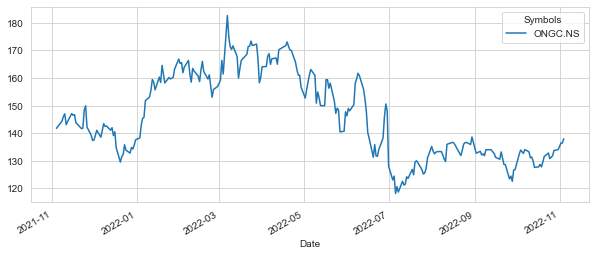

In [10]:
# Let's plot the Adjusted Close price of the ONGC Stocks for a little visualization

ongc['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

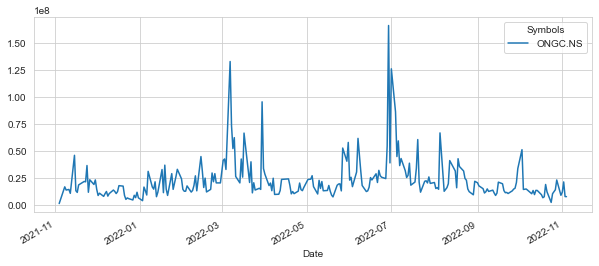

In [11]:
# Lets plot the volume traded for ONGC Stocks

ongc['Volume'].plot(legend=True,figsize=(10,4))

# ---------------------------------------------------------------------------------------------------------------
# 2.) Moving average of the various stocks

In [12]:
# Now lets move on to calculating moving averages for 7 days,15 days, 30 days 

ongc['MA for 7 Days']= ongc['Adj Close'].rolling(7).mean()
ongc['MA for 15 Days']= ongc['Adj Close'].rolling(15).mean()
ongc['MA for 30 Days']= ongc['Adj Close'].rolling(30).mean()



<AxesSubplot:xlabel='Date'>

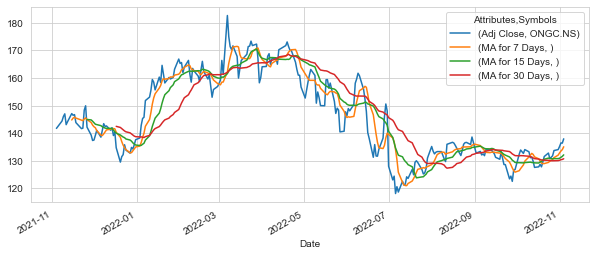

In [13]:
#Now lets plot all the moving averages

ongc[['Adj Close','MA for 7 Days','MA for 15 Days','MA for 30 Days']].plot(figsize=(10,4),subplots=False)

# The moving average indicator is a very important tool in predicting the support and resistance level of the stocks 
# The moving average indicator is not severely affected by daily fluctuations and help us determine the trend of the stock


# ---------------------------------------------------------------------------------------------------------------
# 3.) Daily return of the stock 

<AxesSubplot:xlabel='Date'>

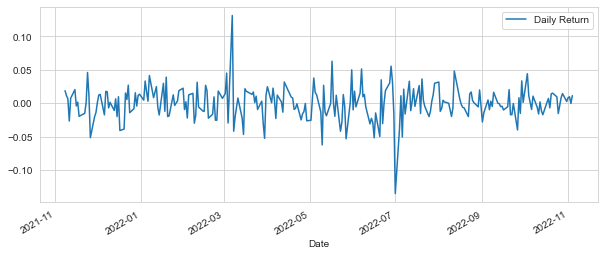

In [14]:
# Lets make a new column for our daily return in  ongc stocks DataFrame

ongc['Daily Return']=ongc['Adj Close'].pct_change()
ongc['Daily Return'].plot(figsize=(10,4),legend=True)


<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

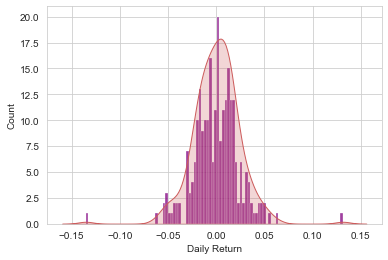

In [15]:
# Lets make a histogram and kernel density estimation overlappping plot for our daily return for better visualization

sns.histplot(ongc['Daily Return'].dropna(),bins=100,color='purple')
sns.kdeplot(ongc['Daily Return'].dropna(),color='indianred',shade=True)

In [16]:
# Lets Create another dataframe of all the oil companies with there adjusted closing recorded in a single DataFrame

closing_df=stocks["Adj Close"]

In [17]:
closing_df.head()

Symbols,ONGC.NS,IOC.NS,HINDPETRO.NS,OIL.NS
Date,,,,
2021-11-04,141.725021,80.924629,304.810120,205.323059
2021-11-08,144.381470,84.410423,327.441254,207.187500
2021-11-09,146.012650,83.959679,326.257599,206.721405
2021-11-10,146.991348,83.809425,327.677979,206.907837
2021-11-11,143.076538,83.092575,324.316467,201.967026


In [18]:
#Now to calculate all the oil companies daily return

oil_rets=closing_df.pct_change()

In [19]:
oil_rets.head()

Symbols,ONGC.NS,IOC.NS,HINDPETRO.NS,OIL.NS
Date,,,,
2021-11-04,NaN,NaN,NaN,NaN
2021-11-08,0.018744,0.043075,0.074247,0.009081
2021-11-09,0.011298,-0.005340,-0.003615,-0.002250
2021-11-10,0.006703,-0.001790,0.004354,0.000902
2021-11-11,-0.026633,-0.008553,-0.010259,-0.023879


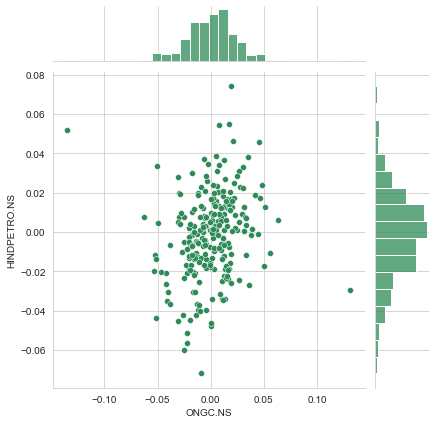

In [20]:
# Now lets compare the stocks price of ONGC Stocks and HPCL Stocks on the same timeframe

sns.jointplot(data=oil_rets,x='ONGC.NS',y='HINDPETRO.NS',kind='scatter',color='seagreen')

# So  we can see there is an abrupt correlation between the oil stocks though not very sharp and a few outliers could also be seen

# ---------------------------------------------------------------------------------------------------------------
# 4.) Correlation between different stocks on basis of daily returns

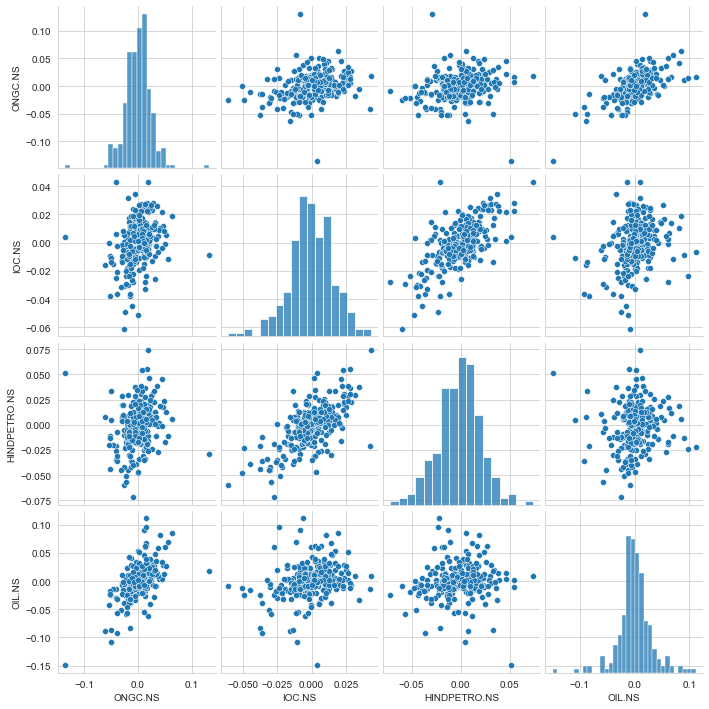

In [21]:
#  Now lets take all our oil stocks and compare them all at once using their daily return

sns.pairplot(oil_rets.dropna())

# Now by normal visuals we can see there seems to be a little correlation between IOCL and HPCL stocks

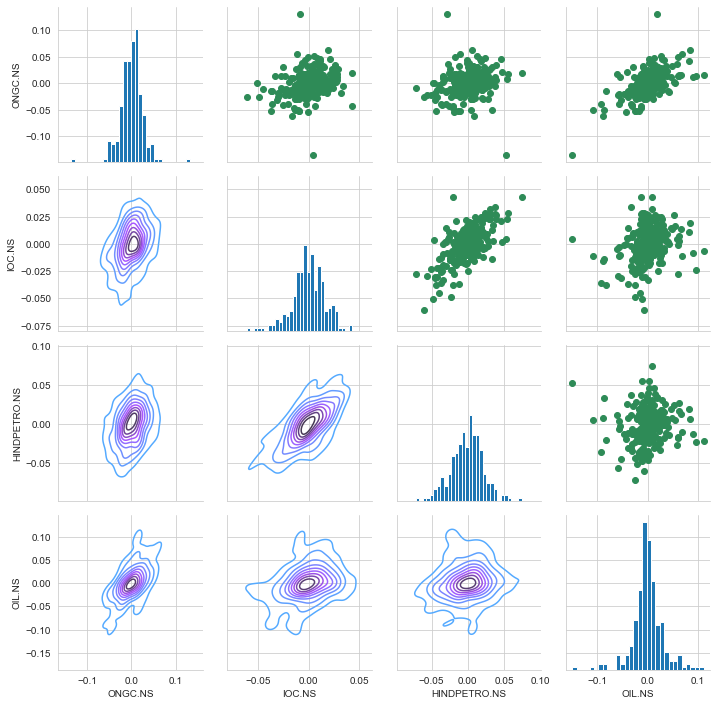

In [22]:
# Now lets reconfirm our deduction with a little help from KDE plot

returns_fig = sns.PairGrid(oil_rets.dropna())

returns_fig.map_upper(plt.scatter,color='seagreen')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

# Now we can clearly see that HPCL and IOCl stocks are highly correlated on the basis of daily return

# ---------------------------------------------------------------------------------------------------------------
# 5.) correlation between different stocks on the basis of Closing Price

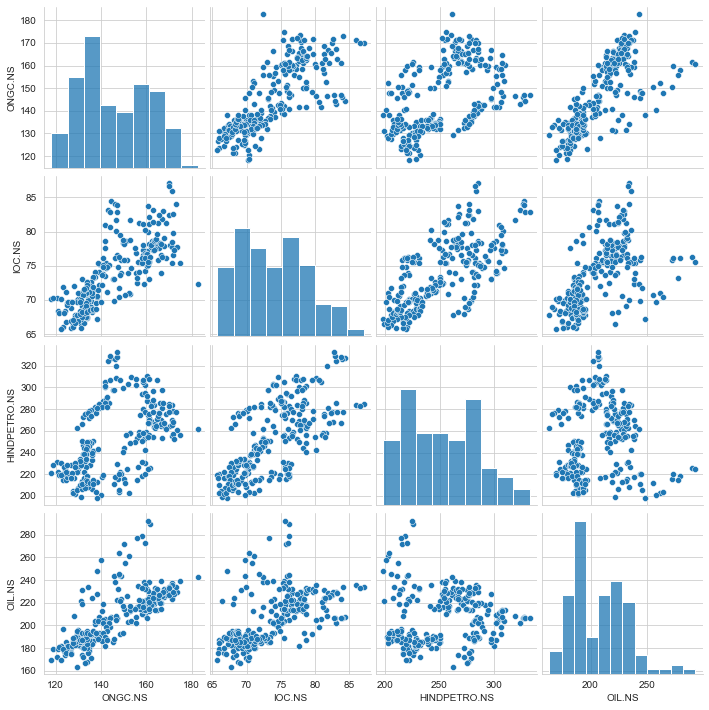

In [23]:
sns.pairplot(closing_df.dropna())

# As we can see there is a little correlation between OIL and ONGC Stocks on the basis of their Closing price

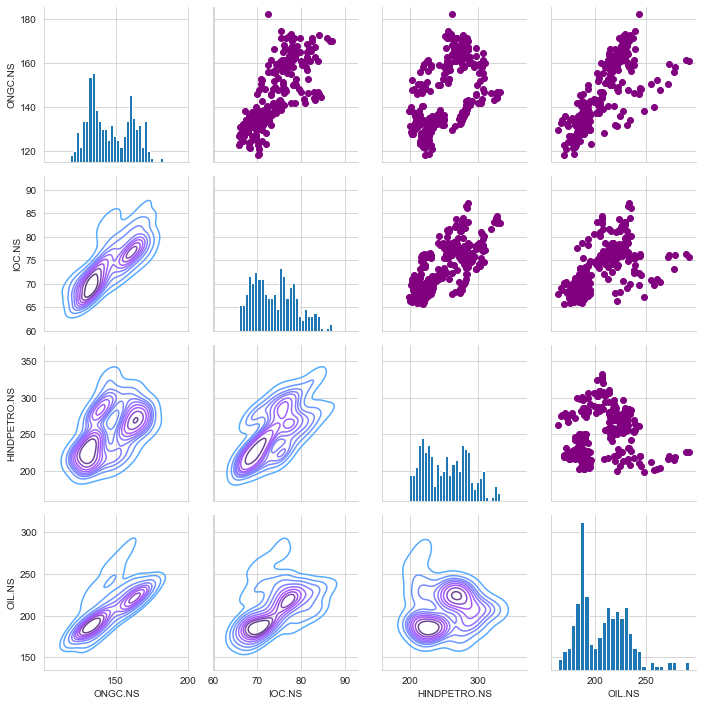

In [24]:
# Lets Reconfirm our deduction using KDE plot

closing_fig = sns.PairGrid(closing_df.dropna())

closing_fig.map_upper(plt.scatter,color='purple')

closing_fig.map_lower(sns.kdeplot,cmap='cool_d')

closing_fig.map_diag(plt.hist,bins=30)

# As we reconfirmed there is high correlation between ONGC and OIL stocks by looking at there KDE plot

# ---------------------------------------------------------------------------------------------------------------
# 6.) Risk Analysis

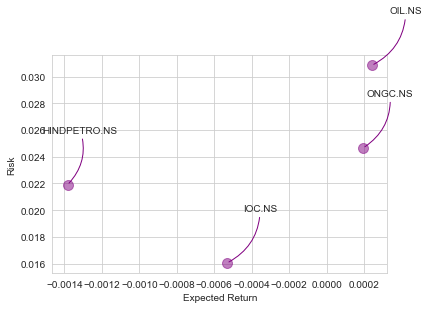

In [25]:
# Let's do a Basic Risk analysis first

rets=oil_rets.dropna()
plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =100,color='purple')
plt.xlabel('Expected Return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-',color='purple', connectionstyle = 'arc3,rad=-0.3'))


# As we can see from the above basic risk analysis
# 1.) ONGC Stocks give the highest return for average risk
# 2.) IOCL Stocks offer the lowest risk
# 3.) HPCL Stocks has lowest expected return
# 4.) OIL Stocks have the highest risk but fairly good return

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

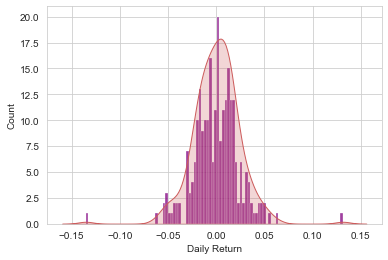

In [26]:
# Now lets do a fairly deep risk analysis using quantiles

sns.histplot(ongc['Daily Return'].dropna(),bins=100,color='purple')
sns.kdeplot(ongc['Daily Return'].dropna(),color='indianred',shade=True)

In [27]:
 rets.head()

Symbols,ONGC.NS,IOC.NS,HINDPETRO.NS,OIL.NS
Date,,,,
2021-11-08,0.018744,0.043075,0.074247,0.009081
2021-11-09,0.011298,-0.005340,-0.003615,-0.002250
2021-11-10,0.006703,-0.001790,0.004354,0.000902
2021-11-11,-0.026633,-0.008553,-0.010259,-0.023879
2021-11-12,0.007492,-0.002626,0.013139,0.024233


In [28]:
cname=['ONGC.NS','IOC.NS','HINDPETRO.NS','OIL.NS']
quantile_list=[]
for a in cname:
    quantile_list.append(rets[a].quantile(0.05))
quantile_df=DataFrame(quantile_list,index=['ONGC','IOCL','HPCL','OIL'],columns=['Quantile Value'])
quantile_df

,Quantile Value
ONGC,-0.039588
IOCL,-0.028830
HPCL,-0.039439
OIL,-0.045065


# So from the above we came to know about the 0.05 empirical quantile of daily return of all our oil stocks
# Simplifying with 95% confidence our loss will not be more than the quantile value of each oil stock for their respective investment 
# For Example if we invest Rs 10000 in ONGC stocks with 95 % confidence we can say that our loss will not exceed 0.041621*10000=Rs 416.21

# ---------------------------------------------------------------------------------------------------------------

# Now we will improve aur accuracy even more by using Monte Carlo method which will take into account the shock factor that could hit the stock price

# we have done a lot of work on ONGC stocks lets take into account HPCL stocks for our prediction in the Monte Carlo method 


In [57]:
# Let's define our variables

days=365
dt=1/days
mu=rets['HINDPETRO.NS'].mean()
sigma=rets['HINDPETRO.NS'].std()

In [58]:
# Lets define our Monte Carlo function 
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price=np.zeros(days)
    price[0]=start_price
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in range (1,days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price
    

In [59]:
hpcl.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,HINDPETRO.NS,HINDPETRO.NS,HINDPETRO.NS,HINDPETRO.NS,HINDPETRO.NS,HINDPETRO.NS
Date,,,,,,
2021-11-04,304.810120,321.899994,322.950012,315.000000,319.000000,987287.0
2021-11-08,327.441254,345.799988,347.000000,322.500000,326.450012,14363175.0
2021-11-09,326.257599,344.549988,348.700012,341.850006,347.200012,3978587.0
2021-11-10,327.677979,346.049988,349.750000,342.250000,343.950012,3326814.0
2021-11-11,324.316467,342.500000,347.799988,339.600006,344.000000,2775400.0


# So for HPCL  our starting price is 304.81

Text(0.5, 1.0, 'Monte Carlo Analysis for HPCL')

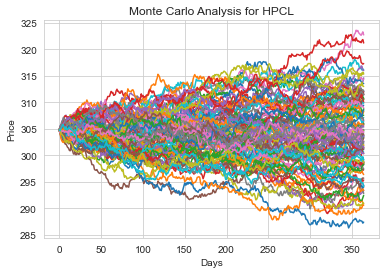

In [60]:
# Now as we have already defined our function above lets use it

start_price=304.81
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for HPCL')

# So now we have our Monte Carlo plot for HPCL but it's very hard to decipher anything from this so lets make it more simple and understandable

In [61]:
# Lets run the above function 10000 times for more accurate results

runs=10000
simulations=np.zeros(runs)

for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1];


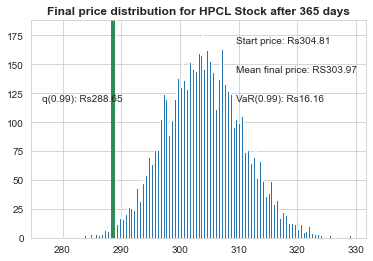

In [62]:
# Now lets define our 1% quantile , this basically means that 99% of the values should fall between here

quant=np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: Rs%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: RS%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): Rs%.2f" % (start_price - quant,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): Rs%.2f" % quant)

# Plot a line at the 1% quantile result
plt.axvline(x=quant, linewidth=4, color='seagreen')

# Title
plt.title(u"Final price distribution for HPCL Stock after %s days" % days, weight='bold');

# So here is our most accurate risk analysis plot for HPCL For 365 days 

# So lets break down what information we got from the last plot

# If you purchase 1 stock of HPCL at its starting price of Rs 304.81 at an average you will have the final price of it as Rs 303.97 which basically indicates that it is a very stable stock which was also confirmed in our very first basic risk analysis

# Taking into the risk consideration of shock factors that could hit the stock with 99% confidence we can say that our loss  would not be more than Rs. 16.16 per stock if bought at Rs 304.81

# --------------------------------------------------------------------------------------------------------------



In [64]:
# Now we will use the ML Algorithms to Predict if we should puchase a stock or not
# Lets select IOCL Stocks as it is a high risk high return Stock
# Lets create our first datset for classifying

def datapreprocess(df):
    df1=df.copy()
    df1.columns=('Adj Close','Close','High','Low','Open','Volume')
    
    df1['Index']=range(df.shape[0])
    df1['Predicted']=0
    df1['index']=range(df.shape[0])
    df1=df1.set_index('Index')
    def predval(i):
        if i<248:
            if df1.loc[i+1,'Adj Close']>df1.loc[i,'Adj Close']:
                return 1
            else:
                return 0
        else:
            return 0
    
    
    
    df1['Predicted']=df1['index'].apply(predval)
    del df1['index']
    return df1

In [65]:
# Lets get our indices data
nifty50=pdr.get_data_yahoo(['^NSEI'],start,end)
nifty500=pdr.get_data_yahoo(['^CRSLDX'],start,end)
sensex=pdr.get_data_yahoo(['^BSESN'],start,end)

In [66]:
iocl_d=datapreprocess(iocl)
sensex_d=datapreprocess(sensex)
nifty50_d=datapreprocess(nifty50)
nifty500_d=datapreprocess(nifty500)

In [67]:
dataset=pd.DataFrame({'IOCL':iocl_d['Predicted'],'Sensex':sensex_d['Predicted'],'Nifty50':nifty50_d['Predicted'],'Nifty500':nifty500_d['Predicted']})
dataset.head()

,IOCL,Sensex,Nifty50,Nifty500
Index,,,,
0,1,1,1,1
1,0,0,0,1
2,0,0,0,0
3,0,0,0,0
4,0,1,1,1


In [68]:
Y=dataset.loc[:,'IOCL']
X=dataset.loc[:,'Sensex':'Nifty500']

In [69]:
# Lets import Scikit learn library for our Model fitting
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , mean_squared_error, r2_score , classification_report , ConfusionMatrixDisplay

In [70]:
# We are going to use Random forest claassifier for our analysis
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [71]:
clf = RandomForestClassifier(n_estimators=100,random_state=0)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
accuracy_score(y_pred,y_test)

0.78

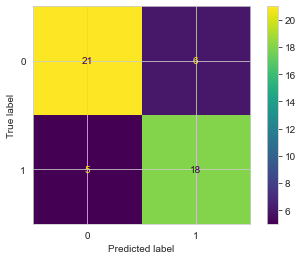

In [72]:
ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test)

Confusion matrix plotted for Our classifier accuracy

In [73]:
#  Now we will take into account different leading oil stocks in india and check for any trends and prediction we can make for our target IOCL stock
#Lets create our dataset for the regressor
reliance=pdr.get_data_yahoo(['RELIANCE.NS'],start,end)
adani=pdr.get_data_yahoo(['ATGL.NS'],start,end)
petronet=pdr.get_data_yahoo(['PETRONET.NS'],start,end)
gail=pdr.get_data_yahoo(['GAIL.NS'],start,end)
ongc1=pdr.get_data_yahoo(['ONGC.NS'],start,end)

In [74]:
def datapreprocess1(df):
    df1=df.copy()
    df1.columns=('Adj Close','Close','High','Low','Open','Volume')
    
    df1['Index']=range(df.shape[0])
    df1['Predicted']=0 
    df1=df1.set_index('Index')
    return df1
iocl_d1=datapreprocess1(iocl)
sensex_d1=datapreprocess1(sensex)
nifty50_d1=datapreprocess1(nifty50)
nifty500_d1=datapreprocess1(nifty500)
reliance_d1=datapreprocess1(reliance)
adani_d1=datapreprocess1(adani)
petronet_d1=datapreprocess1(petronet)
ongc_d1=datapreprocess1(ongc1)
oil_d1=datapreprocess1(oil)
hpcl_d1=datapreprocess1(hpcl)
gail_d1=datapreprocess1(gail)
close=pd.DataFrame({'IOCL':iocl_d1['Adj Close'],'Reliance':reliance_d1['Adj Close'],'Adani':adani_d1['Adj Close'],'OIL':oil_d1['Adj Close'],'HPCL':hpcl_d1['Adj Close'],'Petronet':petronet_d1['Adj Close'],'GAIL':gail_d1['Adj Close']})
close['Sensex']=sensex_d1['Adj Close']
close['Nifty50']=nifty50_d1['Adj Close']
close['Nifty500']=nifty500_d1['Adj Close']
dataset1=close.pct_change()
dataset1.dropna(inplace=True)
dataset1.head()

,IOCL,Reliance,Adani,OIL,HPCL,Petronet,GAIL,Sensex,Nifty50,Nifty500
Index,,,,,,,,,,
1,0.043075,0.001241,0.047177,0.009081,0.074247,0.010140,0.002640,0.007958,0.008470,0.009316
2,-0.005340,0.007894,0.048948,-0.002250,-0.003615,0.006408,-0.008229,-0.001852,-0.001345,0.001405
3,-0.001789,0.011183,0.022887,0.000902,0.004354,-0.002759,0.009625,-0.001334,-0.001499,-0.001342
4,-0.008553,0.001824,0.029637,-0.023879,-0.010259,0.008300,-0.017094,-0.007177,-0.007970,-0.007087
5,-0.002626,0.015091,0.002622,0.024233,0.013139,0.000000,-0.010033,0.012800,0.012821,0.010895


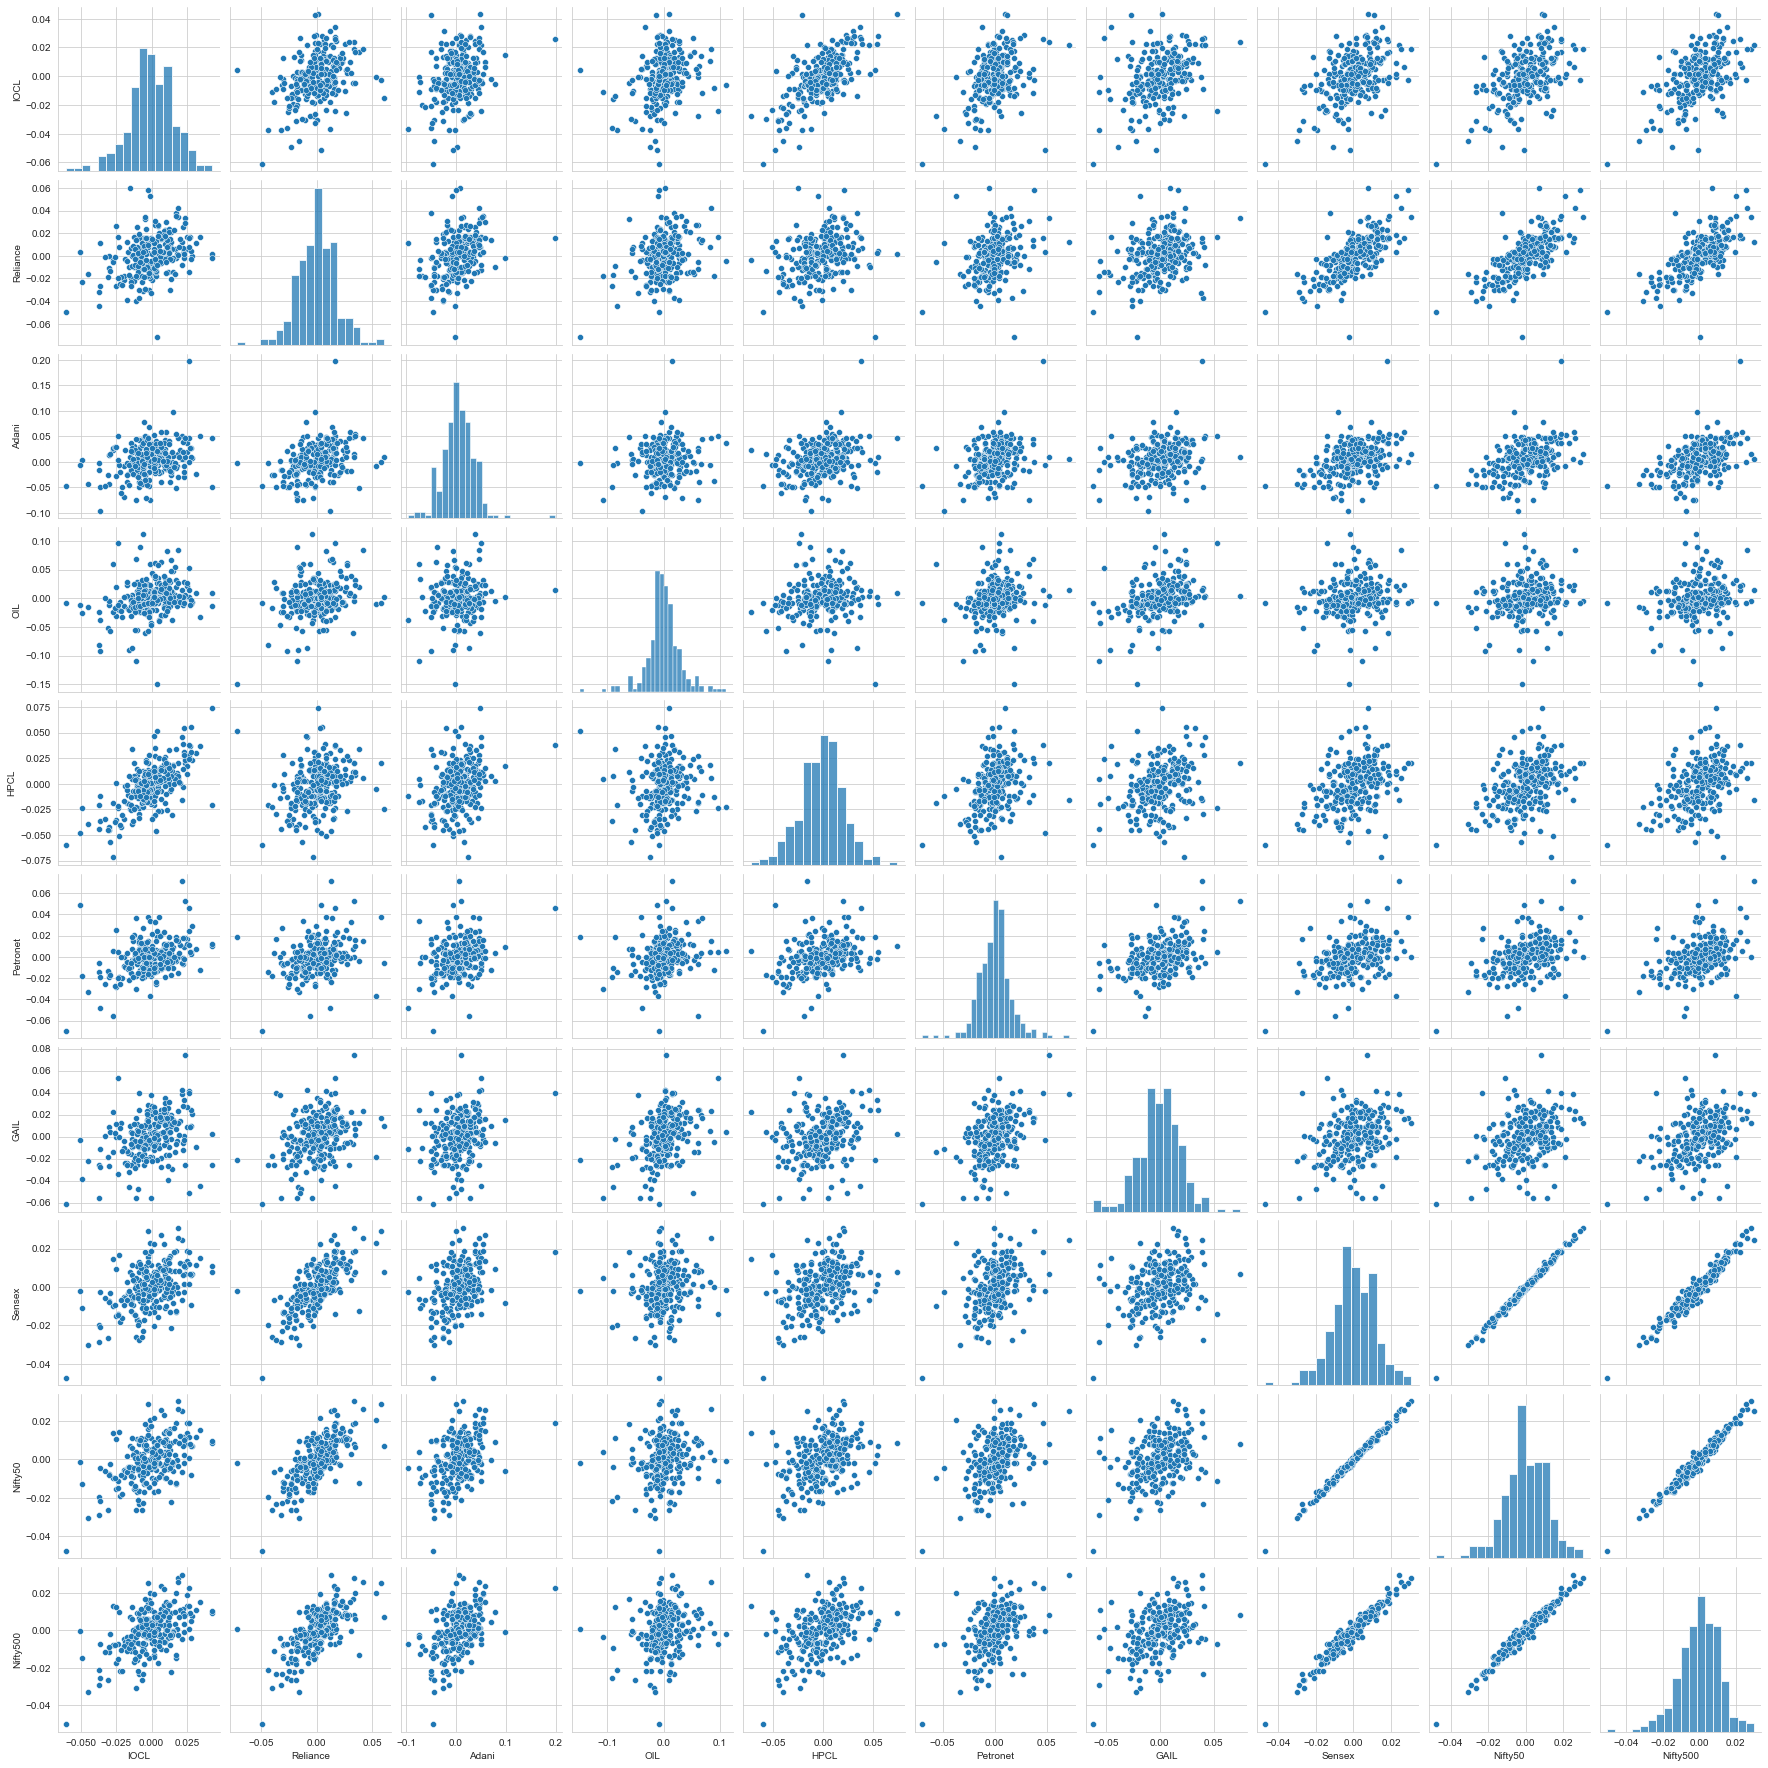

In [75]:
# So here We have our dataset ready
sns.pairplot(dataset1)

In [76]:
#Lets first use randomforest regressor
from sklearn.linear_model import LinearRegression
X1=dataset1.loc[:,'Reliance':'Sensex'] # By analyzing the graph and running through different modelling we conclude that including nifty 50 and nifty 500 is decreasing the performance of regressor but sensex is increasing it
Y1=dataset1.loc[:,'IOCL']

In [77]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.4, random_state=0)
reg=LinearRegression()
reg.fit(x_train1,y_train1)
y_pred1=reg.predict(x_test1)
r2_score(y_test1,y_pred1)

0.445164391371093

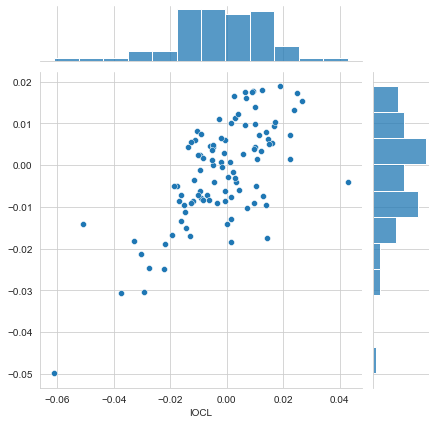

In [78]:
sns.jointplot(x=y_test1,y=y_pred1)

# Thank you for being with me till the end

# Regards Mihir